<a href="https://colab.research.google.com/github/EOKELLO/Customer-Behaviour/blob/master/CUSTOMER_BEHAVIOUR_NOTEBOOK_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM DEFINITION**

To help Kira Plastinina to understand their customer behaviour given the marketing and sales data they have collected in the past

# **METRICS OF SUCCESS**

Create a model that distinctively segments the customer when visualised

perform extensive EDA to grasp an understanding of their customer behaviours

# **THE CONTEXT**

we shall use the historical data collected by Kira Plastinina to establish the customer behaviour and try to segment the customers
Company - Kira Plastinina has since defunct





# **EXPERIMENTAL DESIGN**

1.Problem Definition

2.Data Sourcing

3.Check the Data

4.Perform Data Cleaning

5.Perform Exploratory Data Analysis  (Univariate, 

6.Bivariate & Multivariate)

7.Implement the Solution

8.Challenge the Solution

9.Follow up Questions

# **APPROPRIATENESS OF THE DATA**

1.The data is appropriate in terms of volume

2.the data features are relevant

In [1]:
install.packages('DataExplorer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [2]:
#Importing libraries
library(readr)
library(dplyr)
library(ggplot2)
library(DataExplorer)
library(tidyverse)
library(DescTools)
library(ggpubr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: ignored

Data Sourcing

In [0]:
#our data source
url <- "http://bit.ly/EcommerceCustomersDataset"
customer <- read.csv(url)

CHECKING OUR DATASET

In [4]:
head(customer)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [5]:
tail(customer)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [6]:
dim(customer)

[1] 12330    18

In [7]:
names(customer)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [8]:
class(customer)

[1] "data.frame"

In [9]:
str(customer)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [10]:
glimpse(customer)

Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, …
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

In [11]:
summary(customer)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [12]:
colSums(is.na(customer))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

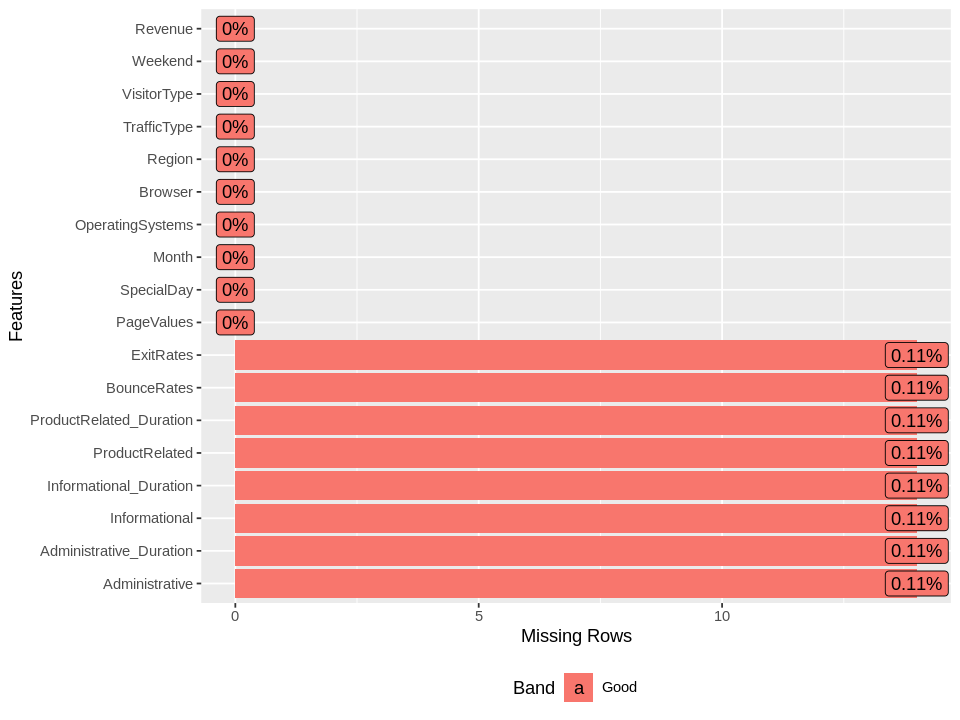

In [13]:
options(repr.plot.width=8, repr.plot.height=6)
# look for missing values using the DataExplorer package
plot_missing(customer)

viewing the dataset size and the missing value plot looks like we 
drop the missing values and stil have  a good dataset to work on but we shall not drop them.


# **DATA CLEANING**

The above dataset has missing values. we shall fill the missing values with their respective means as below

In [0]:
# IMPUTING NULL VALUES
customer = customer %>%
   mutate(Administrative =replace(Administrative,is.na(Administrative),mean(Administrative,na.rm=TRUE)))%>%
   mutate(Administrative_Duration =replace(Administrative_Duration,is.na(Administrative_Duration),mean(Administrative_Duration,na.rm=TRUE)))%>%
   mutate(Informational =replace(Informational,is.na(Informational),mean(Informational,na.rm=TRUE)))%>%
   mutate(Informational_Duration =replace(Informational_Duration,is.na(Informational_Duration),mean(Informational_Duration,na.rm=TRUE)))%>%
   mutate(ProductRelated =replace(ProductRelated,is.na(ProductRelated),mean(ProductRelated,na.rm=TRUE)))%>%
   mutate(ProductRelated_Duration =replace(ProductRelated_Duration,is.na(ProductRelated_Duration),mean(ProductRelated_Duration,na.rm=TRUE)))%>%
   mutate(BounceRates =replace(BounceRates,is.na(BounceRates),mean(BounceRates,na.rm=TRUE)))%>%
   mutate(ExitRates =replace(ExitRates,is.na(ExitRates),mean(ExitRates,na.rm=TRUE)))


In [15]:
#we check whether the missing values were filled successfully.
colSums(is.na(customer))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [0]:
#for our visualization we need to have our features in the correct
#data types so we convert the appropriate features into factors
customer$Region <- as.factor(customer$Region)
customer$VisitorType <- as.factor(customer$VisitorType)
customer$Weekend <- as.factor(customer$Weekend)
customer$OperatingSystems <- as.factor(customer$OperatingSystems)
customer$Informational <- as.factor(customer$Informational)
customer$ProductRelated <- as.factor(customer$ProductRelated)
customer$SpecialDay <- as.factor(customer$SpecialDay)
customer$Administrative <- as.factor(customer$Administrative)


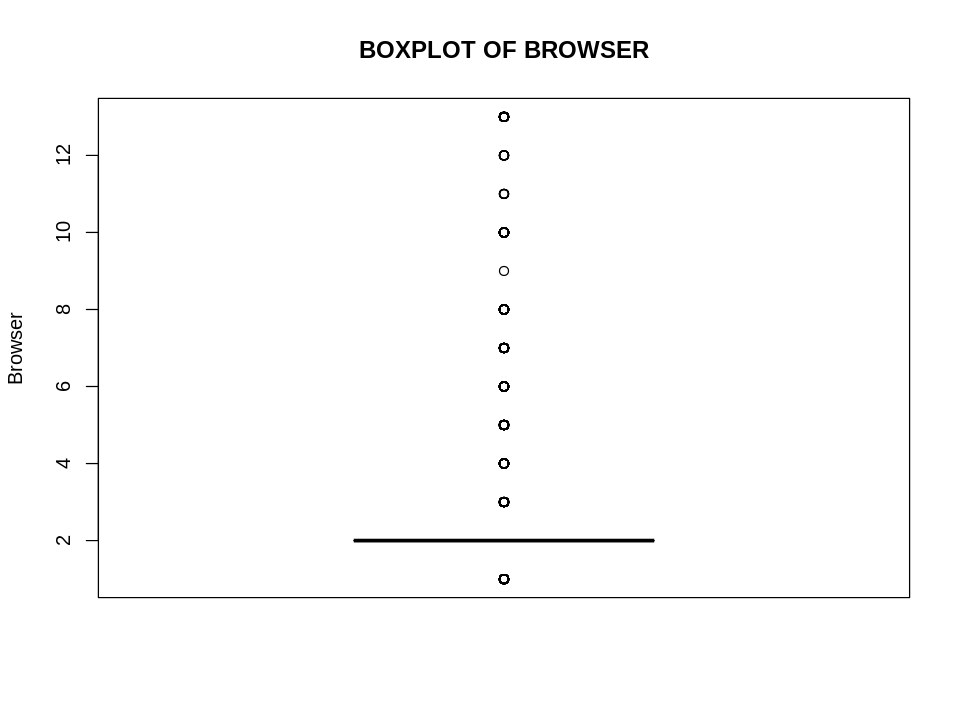

In [17]:
boxplot(customer$Browser,
        main = toupper("Boxplot of Browser"),
        ylab = "Browser",
        col = "maroon")

In [0]:
boxplot(customer$BounceRates,
        main = toupper("Boxplot of BounceRates"),
        ylab = "BounceRates",
        col = "maroon")

In [0]:
boxplot(customer$ExitRates,
        main = toupper("Boxplot of ExitRates"),
        ylab = "ExitRates",
        col = "maroon")

In [0]:
boxplot(customer$PageValues,
        main = toupper("Boxplot of PageValues"),
        ylab = "PageValues",
        col = "maroon")

In [0]:
boxplot(customer$TrafficType,
        main = toupper("Boxplot of TrafficType"),
        ylab = "TrafficType",
        col = "maroon")

our dataset has outliers in the columns Traffic type,pagevalues,exitrates, bouncerates, browsers . we shall work with an assumption that all outliers are to be investigated so we shall retain them.
we also hope to use them in our analysis in that we shall visualize our analysis with and without them then we compare

# **UNIVARIATE ANALYSIS **

In [0]:
ggplot(data = customer) +
  geom_bar(mapping = aes(x = Weekend))

There were more observations recorded on weekdays than on weekends. 

In [0]:
ggplot(data = customer) +
  geom_bar(mapping = aes(x = Month))

January and April appear to be very slow months for this business and looks like customers dont transact in these two months.
May is busiest month

In [0]:
ggplot(data = customer) +
  geom_bar(mapping = aes(x = Revenue))

More data that does not generate revenue was collected as compared to those that generate revenue

In [0]:
hist(customer$TrafficType,
    main = "histogram of TrafficType",
    xlab = "TrafficType",
    col = "darkmagenta")

The trafic types between 0 and 5 are the most used.

In [0]:
d <- density(customer$ExitRates)
plot(d, main = "Kernel density of ExitRate")
polygon(d, col = "red", border = "blue")

from the kernel density above we gather that our variable ie ExitRate distribution is distinctly skewed, its not normal

In [0]:
d <- density(customer$BounceRates)
plot(d, main = "Kernel density of BounceRates")
polygon(d, col = "red", border = "blue")

from the kernel density above we gather that our variable ie BounceRates distribution is distinctly skewed, its not normal

In [0]:
ggplot(data = customer, mapping = aes(x = BounceRates, colour = Region)) +
  geom_freqpoly(binwidth = 0.1)

from the plot above we can see that customers in region 1 record the highest  bouncerates while those from region 5
record the lowest bounce rates.



# **BIVARIATE ANALYSIS **

Revenue versus other variables

In [0]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = PageValues, y = Weekend, color = Revenue))

There were more PageValues on weekdays than on weekend and a majority on them earned revenue.


In [0]:
stripchart(PageValues ~Month,
data=customer,
main="Different strip chart for each month",
xlab="Months",
ylab="PageValues",
col="brown3",
group.names=c('Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'),
vertical=TRUE,
pch=16
)

Dec and No recorded the highest page values with feb recording the least


In [0]:
stripchart(PageValues ~SpecialDay,
data=customer,
main="Different strip chart for each SpecialDay",
xlab="pagevalues",
ylab="SpecialDay",
col="Darkmagenta",
group.names=c('0', '0.2', '0.4', '0.6', '0.8', '1'),
vertical=TRUE,
pch=16
)

page value type 1 was the busiest on the specialdays

In [0]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = PageValues, y = Weekend, color = Revenue))

weekdays recorded higher page values

In [0]:
stripchart(PageValues ~Revenue,
data=customer,
main="Different strip chart for each Revenue",
xlab="PageValues",
ylab="Revenue",
col="Darkmagenta",
group.names=c(FALSE, TRUE),
vertical=TRUE,
pch=16
)

Most of the pagevalues translated into revenues.


In [0]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = ExitRates, y = Revenue, color = Weekend))

most of the exit rates did not translate to revenues

In [0]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = SpecialDay, y = PageValues, color = Weekend))

special days had higher pagevalues on weekdays

In [0]:
ggplot(data = customer) + 
  geom_boxplot(aes(x = SpecialDay,y = TrafficType, color = Revenue))

Traffictype 5 was the most famous with SpecialDay 0.6 recording the highest revenue

In [0]:
ggplot(data = customer) + 
    geom_boxplot(aes(x = VisitorType, y = TrafficType, color= Revenue))

# **MULTIVARIATE ANALYSIS**

In [0]:
install.packages("corrplot")

In [0]:
library(corrplot)

In [0]:
number_customer = customer[, sapply(customer, is.numeric)]
  

In [0]:
cor(number_customer, use = "complete.obs", method = "pearson")

In [0]:
corrplot(cor(number_customer), method = "shade")

From the plot above the correlations between the variables is zero save for administrative_duration,informational_duration and productrelated_duration that have a weak correlation with each other.

bounce rates and exit rates a highly correlated

# **HIERARCHICAL CLUSTERING**

In [0]:
#Load dataset
url <- "http://bit.ly/EcommerceCustomersDataset"
customer <- read.csv(url)

In [19]:
#Previewing

head(customer)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [20]:
#Dropping the Revenue column

customer.new= customer[, c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]
customer.class=customer[, 'Revenue']
head(customer.new)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE


In [21]:
#Dummy variables

library(caret)
dummies = dummyVars(" ~ .", data = customer.new)

new = data.frame(predict(dummies, newdata = customer.new))

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [22]:
#Preveiw the dataset

head(new)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,0,1,1,1,1,0,0,1,1,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,0,2,2,1,2,0,0,1,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,0,4,1,9,3,0,0,1,1,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,0,3,2,2,4,0,0,1,1,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,0,3,3,1,4,0,0,1,0,1
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,0,2,2,1,3,0,0,1,1,0


In [23]:
#Shape of  the data

dim(new)

[1] 12330    29

In [0]:
#We then scale our dataset
new <- scale(new)

In [0]:
#we then proceed to segment using the hclustering
#we fisrt use dist() function to compute the euclidean distance between the 
#the observations
d <- dist(new, method = "euclidean")

In [0]:
# We then hierarchical clustering using the Ward's method
result.hc <- hclust(d, method = "ward.D2",members = NULL)

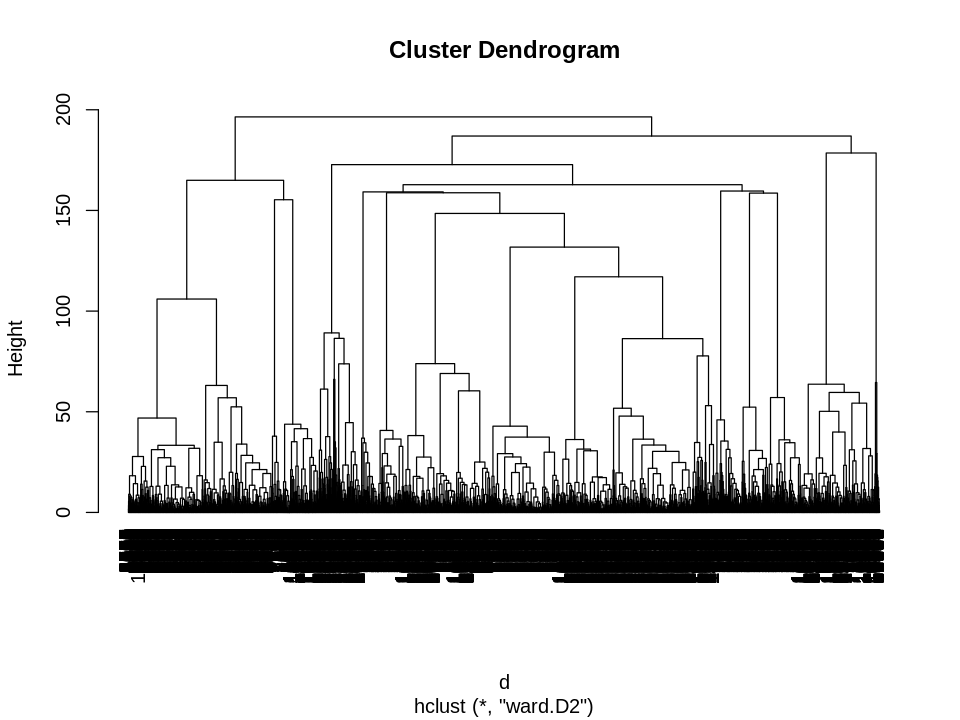

In [27]:
#we then plot the obtained dendrogram
plot(result.hc, hang = -0.8, main = "Cluster Dendrogram", cex = 1.0 )

# **KMEANS**

In [28]:
install.packages('cluster')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [29]:
head(customer.new)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE


In [30]:
head(new)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.67247746,3.2352400,-0.317165,-0.3088088,⋯,-0.1941675,-1.2333763,-0.7902608,-0.8941422,-0.76259811,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.5913358,-0.45743910,1.1745443,-0.317165,-0.3088088,⋯,-0.1941675,-0.1360728,-0.2079435,-0.8941422,-0.51416134,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294
-0.6975533,-0.4631119,-0.3966145,-0.2521304,-0.6914734,-0.6252895,3.67247746,3.2352400,-0.317165,-0.3088088,⋯,-0.1941675,2.0585344,-0.7902608,2.4369825,-0.26572458,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.6233742,0.57504004,1.9988226,-0.317165,-0.3088088,⋯,-0.1941675,0.9612308,-0.2079435,-0.4777516,-0.01728781,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.4891823,-0.2969835,-0.04444744,0.1441964,-0.317165,-0.3088088,⋯,-0.1941675,0.9612308,0.3743739,-0.8941422,-0.01728781,-0.3990708,-0.08331294,0.4106044,-1.8162862,1.8162862
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.2868911,-0.5442099,-0.13139305,-0.3800157,-0.317165,-0.3088088,⋯,-0.1941675,-0.1360728,-0.2079435,-0.8941422,-0.26572458,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294


In [0]:
library('cluster')

In [0]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")
 

In [34]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [0]:
new = na.omit(new)

In [0]:
# We would then normalize the attributes between 0 and 1 using our own function.
new <- as.data.frame(apply(new,2 , function(x) (x - min(x))/(max(x)-min(x))))

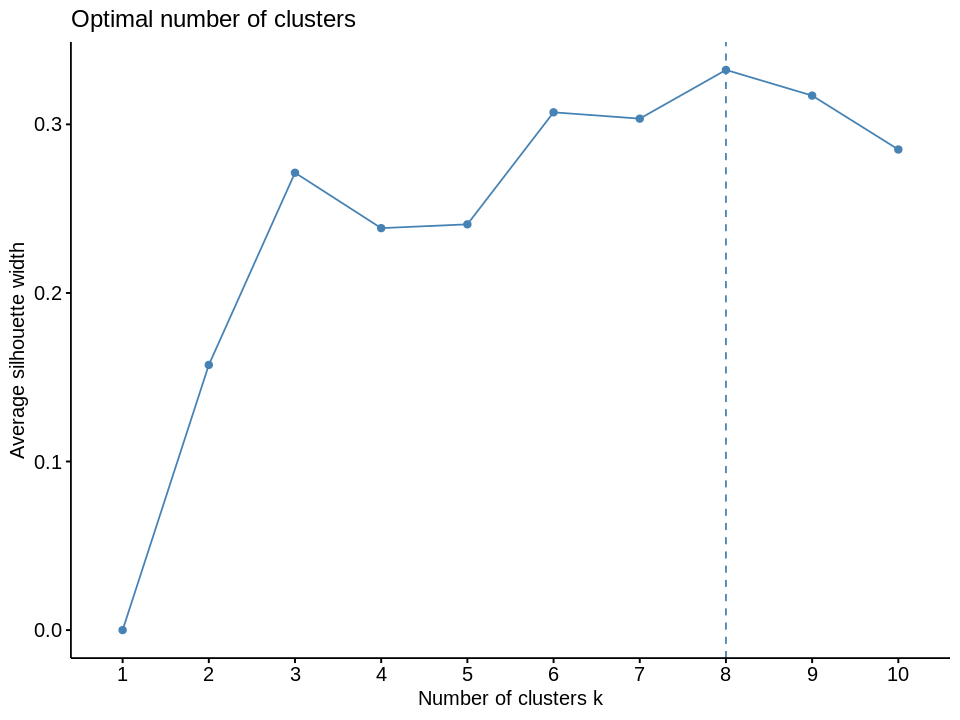

In [35]:
fviz_nbclust(new, kmeans, method='silhouette')

In [0]:
# Compute k-means with k = 2
set.seed(123)
km.res <- kmeans(new, 2, nstart = 25)

In [0]:
# Applying the K-means clustering algorithm with no. of centroids(k)=3
result <- kmeans(new,centers = 2,nstart = 25)

In [0]:
#print the number of records in each cluster
result$size

In [0]:
# Getting the value of cluster center datapoint value(2 centers for k)
result$center

In [0]:
# Getting the cluster vector that shows the cluster where each record falls
result$cluster

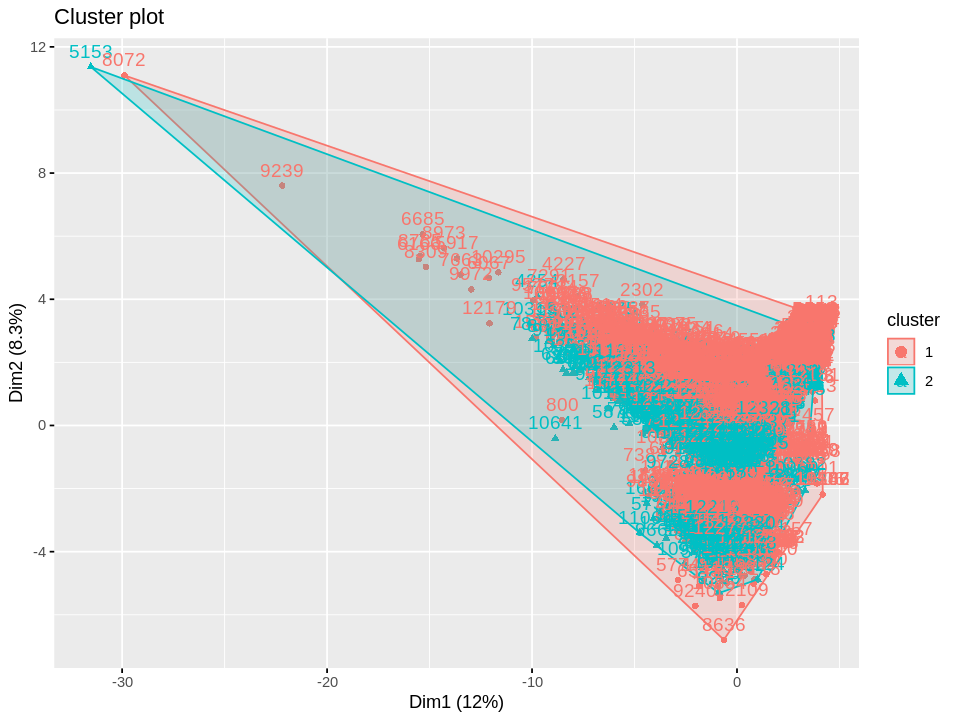

In [39]:
#lets now do our cluster plot
fviz_cluster(km.res, new)

The results are as above and we can clearly see that kmeans is sensitive to outliers
this interferes with the partitioning.it would be ideal to investigate and deal with the outliers

PCA

In [0]:
#Load factoextra for visualization
library(factoextra)

In [0]:
new.pca <- prcomp(new, center=TRUE, scale. = TRUE)

In [41]:
summary(new.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8692 1.54941 1.41540 1.33643 1.28657 1.19976 1.14979
Proportion of Variance 0.1205 0.08278 0.06908 0.06159 0.05708 0.04963 0.04559
Cumulative Proportion  0.1205 0.20326 0.27234 0.33393 0.39100 0.44064 0.48623
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.0635 1.05897 1.03127 1.02114 1.01847 1.01481 1.00766
Proportion of Variance 0.0390 0.03867 0.03667 0.03596 0.03577 0.03551 0.03501
Cumulative Proportion  0.5252 0.56389 0.60057 0.63652 0.67229 0.70780 0.74282
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.98054 0.97292 0.96666 0.94760 0.90252 0.86705 0.7896
Proportion of Variance 0.03315 0.03264 0.03222 0.03096 0.02809 0.02592 0.0215
Cumulative Proportion  0.77597 0.80861 0.84083 0.87180 0.89988 0.92581 0.9473
                          PC22    PC23

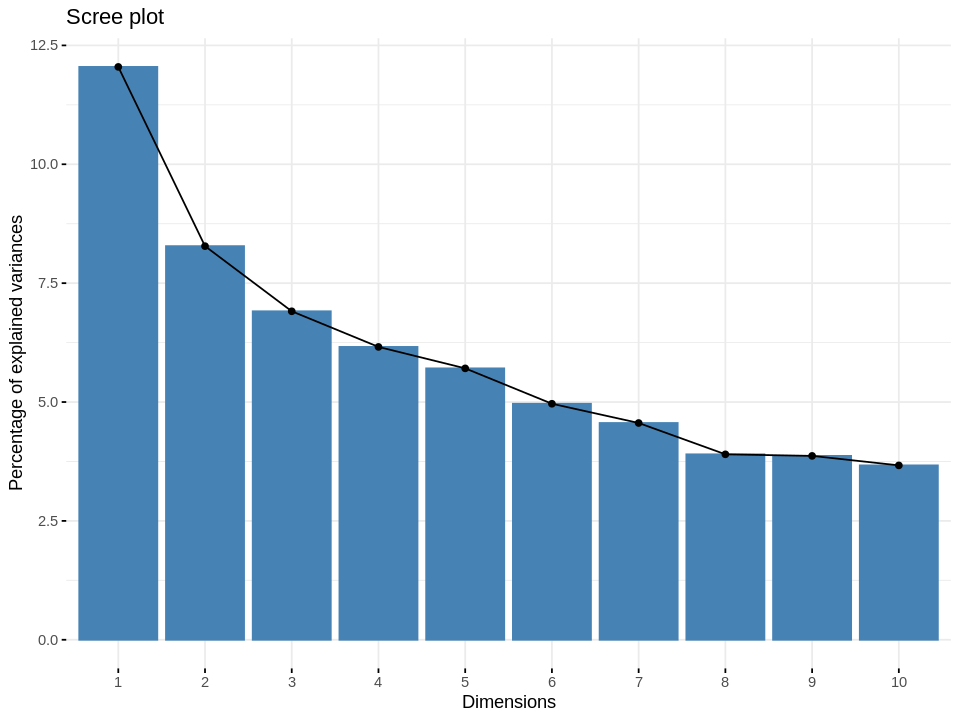

In [42]:
#Visualize eigenvalues (scree plot). 
#Show the percentage of variances explained by each principal component.
fviz_eig(new.pca)

The first principal component  explains 12% of the variance

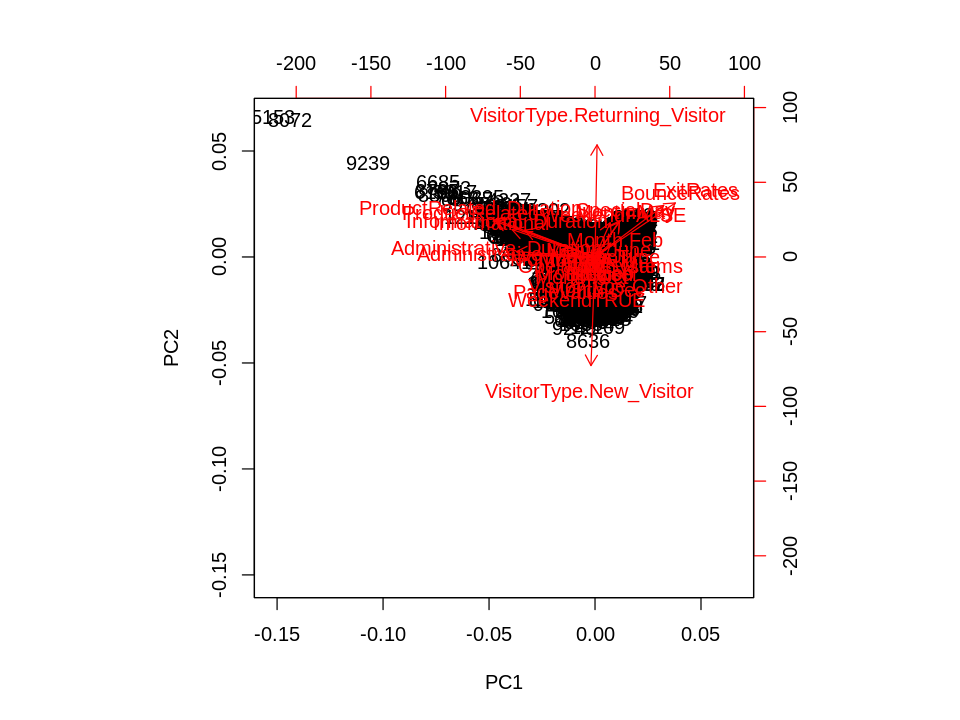

In [43]:
biplot(new.pca)

# **t-SNE**

t-SNE is a useful dimensionality reduction method that allows you to visualise data embedded in a lower number of dimensions, e.g. 2, in order to see patterns and trends in the data. It can deal with more complex patterns of Gaussian clusters in multidimensional space. Although is not suited to finding outliers because how the samples are arranged does not directly represent distance, like in PCA.

In [45]:
install.packages('Rtsne')
library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
new <- new[!duplicated(new),]

In [0]:
rtnse = Rtsne(new)


In [52]:
# Executing the algorithm on curated data
# 
tsne <- Rtsne(new, dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)


Performing PCA
Read the 12199 x 29 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 12199
Done in 2.90 seconds (sparsity = 0.010177)!
Learning embedding...
Iteration 50: error is 99.953836 (50 iterations in 2.97 seconds)
Iteration 100: error is 81.481169 (50 iterations in 3.10 seconds)
Iteration 150: error is 73.719263 (50 iterations in 2.25 seconds)
Iteration 200: error is 70.861888 (50 iterations in 2.27 seconds)
Iteration 250: error is 69.244996 (50 iterations in 2.26 seconds)
Iteration 300: error is 2.563743 (50 iterations in 2.26 seconds)
Iteration 350: error is 2.194275 (50 iterations in 2.30 seconds)
Iteration 400: error is 1.927836 (50 iterations in 2.28 seconds)
Iteration 450: error is 1.736514 (50 iterations in 2.20 seconds)
Iteration 500: error is 1.593109 (50 iterations in 2.24 seconds)
Fitting performed in 24.14 seconds.


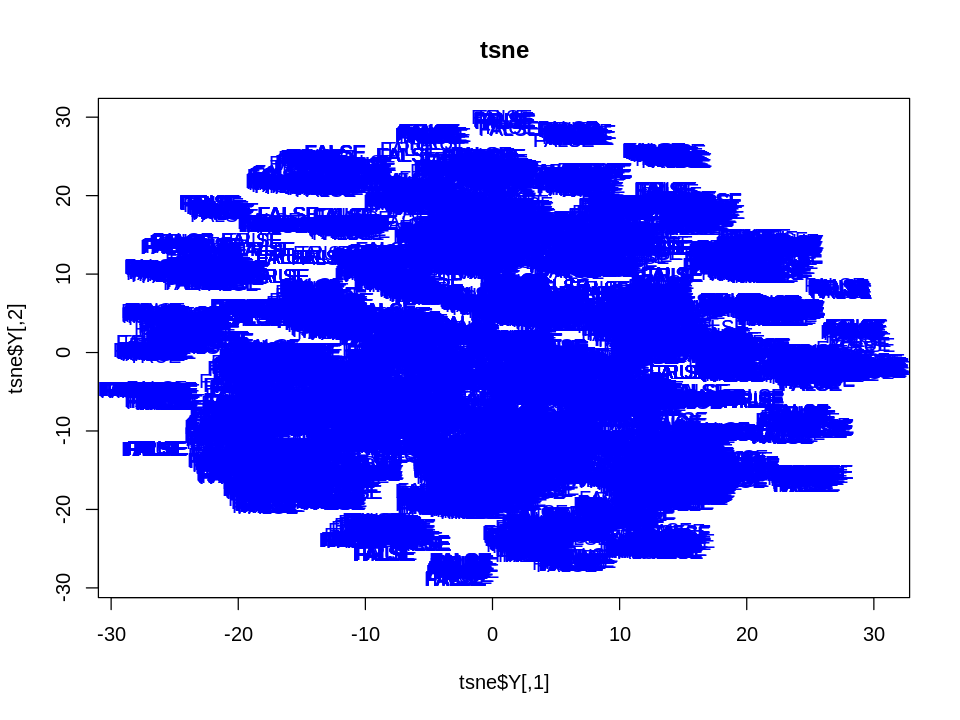

In [53]:
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=customer$Revenue, col='blue')
